In [190]:
import pandas as pd

In [206]:
data = pd.read_csv("tweets/tweets.csv")
data["tweet"].head()

c:\users\vincent\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0    WoW, #VRA! What a bounce!  https://t.co/ItnKCe...
1                                 @AltcoinDailyio $VRA
2    @CryptoDevil9 Well hard to tell, want to buy t...
3    @DrVeraSTONE @Aion Polx deve fazer uma corrida...
4    🔥 $80 billion were just poured into the market...
Name: tweet, dtype: object

In [207]:
tweets = pd.DataFrame(columns = ['id', 'date', 'time', 'content', 'replies_count', 'retweets_count', 'likes_count', 'polarity', 'sentiment'])
tweets['id'] = data['id']
tweets['date'] = data['date']
tweets['time'] = data['time']
tweets['content'] = data['tweet']
tweets['replies_count'] = data['replies_count']
tweets['retweets_count'] = data['retweets_count']
tweets['likes_count'] = data['likes_count']
tweets.head()

,id,date,time,content,replies_count,retweets_count,likes_count,polarity,sentiment
0,1407389240804139018,2021-06-22,19:25:17,"WoW, #VRA! What a bounce! https://t.co/ItnKCe...",0,0,0,NaN,NaN
1,1407388881557803012,2021-06-22,19:23:52,@AltcoinDailyio $VRA,0,0,0,NaN,NaN
2,1407388649147310091,2021-06-22,19:22:56,"@CryptoDevil9 Well hard to tell, want to buy t...",0,0,0,NaN,NaN
3,1407388556205727747,2021-06-22,19:22:34,@DrVeraSTONE @Aion Polx deve fazer uma corrida...,0,0,0,NaN,NaN
4,1407387983624421378,2021-06-22,19:20:17,🔥 $80 billion were just poured into the market...,2,2,10,NaN,NaN


In [208]:
print(sum(tweets['date'] == '2021-06-16'))
# like this we can count number of rows with this condition
#list(data.columns)

1360


In [209]:
from datetime import date, timedelta, datetime

sent_dict = []

# get selected dates
sdate = input("Enter date from (yyyy-mm-dd): ")   # start date
sdate = datetime.strptime(sdate, '%Y-%m-%d')
edate = input("Enter date until (yyyy-mm-dd): ") # end date
edate = datetime.strptime(edate, '%Y-%m-%d')

delta = edate - sdate       # as timedelta

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    day = day.strftime('%Y-%m-%d')
    sent_dict.append({'date':day, 'term_frequency':sum(tweets['date']==day)})

sentiment_data = pd.DataFrame(data=sent_dict, columns = ['date', 'term_frequency', 'sum_sentiment', 'mean_sentiment', 'weighted_mean_sentiment'])
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])  
sentiment_data.head()

Enter date from (yyyy-mm-dd):  2021-01-01
Enter date until (yyyy-mm-dd):  2021-06-21


,date,term_frequency,sum_sentiment,mean_sentiment,weighted_mean_sentiment
0,2021-01-01,82,NaN,NaN,NaN
1,2021-01-02,92,NaN,NaN,NaN
2,2021-01-03,122,NaN,NaN,NaN
3,2021-01-04,98,NaN,NaN,NaN
4,2021-01-05,104,NaN,NaN,NaN


In [210]:
price_data = pd.read_csv("price-data/vra-price.csv")
price_data['date'] = pd.to_datetime(price_data['date'])  
mask = (price_data['date'] >= sdate) & (price_data['date'] <= edate)
#print(price_data.loc[mask])
price_data.head()

,date,open,close,market_cap
0,2021-06-21,0.01,0.01,45.579077
1,2021-06-20,0.01,0.01,55.565523
2,2021-06-19,0.01,0.01,55.244822
3,2021-06-18,0.02,0.01,54.775540
4,2021-06-17,0.02,0.02,58.953596


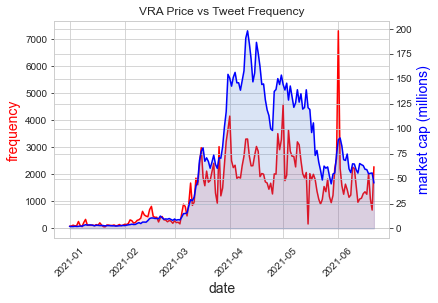

In [211]:
import seaborn as sns

# set the seaborn style
sns.set_style("whitegrid")
 
# Color palette
blue, = sns.color_palette("muted", 1)

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(sentiment_data['date'], sentiment_data['term_frequency'], color="red")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("frequency",color="red",fontsize=14)
ax.set_xticks(sentiment_data['date'][::7])
ax.set_xticklabels(sentiment_data['date'][::7], rotation=45)
ax.fill_between(sentiment_data['date'], 0, sentiment_data['term_frequency'], alpha=.1, color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(price_data.loc[mask, 'date'], price_data.loc[mask, 'market_cap'],color="blue")
ax2.set_ylabel("market cap (millions)",color="blue",fontsize=14)
ax2.fill_between(price_data.loc[mask, 'date'], 0, price_data.loc[mask, 'market_cap'], alpha=.2, color=blue,)
plt.title('VRA Price vs Tweet Frequency')
plt.show()